# Linear Regression

The purpose of machine learning is often to create a model that explains some real-world data, so that we can predict what may happen next, with different inputs.

The simplest model that we can fit to data is a line. When we are trying to find a line that fits a set of data best, we are performing Linear Regression.

We often want to find lines to fit data, so that we can predict unknowns.

A line is a rough approximation, but it allows us the ability to explain and predict variables that have a linear relationship with each other. In the rest of the lesson, we will learn how to perform Linear Regression.

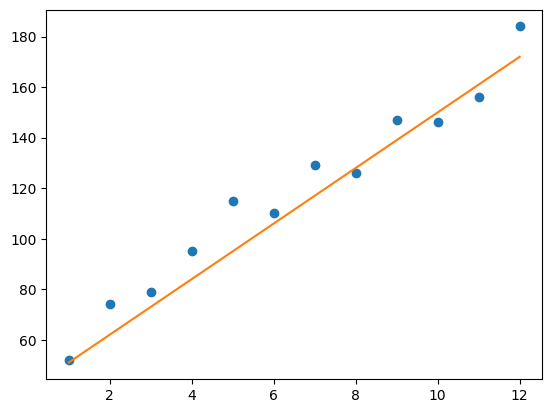

In [1]:
import matplotlib.pyplot as plt
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#slope:
m = 11
#intercept:
b = 40

y = [x * m + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()

## Loss

When we think about how we can assign a slope and intercept to fit a set of points, we have to define what the best fit is.

For each data point, we calculate loss, a number that measures how bad the model’s (in this case, the line’s) prediction was. You may have seen this being referred to as error.

We can think about loss as the squared distance from the point to the line. We do the squared distance (instead of just the distance) so that points above and below the line both contribute to total loss in the same way.

In [2]:
x = [1, 2, 3]
y = [5, 1, 3]

#y = x
m1 = 1
b1 = 0

#y = 0.5x + 1
m2 = 0.5
b2 = 1

y_predicted1 = [i * m1 + b1 for i in x]
y_predicted2 = [i * m2 + b2 for i in x]

total_loss1 = 0
squared_diffs = [(i - j) ** 2 for i, j in zip(y, y_predicted1)]
for i in squared_diffs:
  total_loss1 += i

total_loss2 = 0
squared_diffs = [(i - j) ** 2 for i, j in zip(y, y_predicted2)]
for i in squared_diffs:
  total_loss2 += i

print(f"Total loss using y_predicted1 = {total_loss1}")
print(f"Total loss using y_predicted2 = {total_loss2}")

better_fit = 0
if total_loss1 < total_loss2:
  better_fit = 1
better_fit = 2

print(f"The better fitting prediction is y_predicted{better_fit}")

Total loss using y_predicted1 = 17
Total loss using y_predicted2 = 13.5
The better fitting prediction is y_predicted2


The goal of a linear regression model is to find the slope and intercept pair that minimizes loss on average across all of the data.

## Gradiant Descent for Intercept

As we try to minimize loss, we take each parameter we are changing, and move it as long as we are decreasing loss. It’s like we are moving down a hill, and stop once we reach the bottom. The process by which we do this is called gradient descent. We move in the direction that decreases our loss the most. Gradient refers to the slope of the curve at any point.

For example, let’s say we are trying to find the intercept for a line. We currently have a guess of 10 for the intercept. At the point of 10 on the curve, the slope is downward. Therefore, if we increase the intercept, we should be lowering the loss. So we follow the gradient downwards.

To find the gradient of loss as intercept changes, the formula comes out to be:

$$GradientLoss_{intercept} = -{2 \over n}\sum_{i = 1}^n (y_i - (mx_i + b))$$

Where $n$ is the number of points we have in the dataset, $m$ is the current gradient guess, and $b$ is the current intercept guess.

In [ ]:
"""
Gradient Descent function for Intercept
"""
def get_gradient_at_b(x, y, b, m):
  diff = sum([j - (m*i+b) for i, j in zip(x, y)])
  b_gradient = (-2 / len(x)) * diff
  return b_gradient

## Gradient Descent for Slope

To find the m gradient, or the way the loss changes as the slope of our line changes, we can use this formula:

$$GradientLoss_{slope} = -{2 \over n}\sum_{i = 1}^n x_i(y_i - (mx_i + b))$$

Where $n$ is the number of points we have in the dataset, $m$ is the current gradient guess, and $b$ is the current intercept guess.

Once we have a way to calculate both the m gradient and the $b$ gradient, we’ll be able to follow both of those gradients downwards to the point of lowest loss for both the $m$ value and the $b$ value. Then, we’ll have the best $m$ and the best $b$ to fit our data.

In [ ]:
"""
Gradient Descent function for Slope
"""
def get_gradient_at_m(x, y, b, m):
  diff = sum([i*(j - (m*i+b)) for i, j in zip(x, y)])
  m_gradient = (-2 / len(x)) * diff
  return m_gradient

**We can scale the size of the step by multiplying the gradient by a _learning rate_**.

In [16]:
def get_gradient_at_b(x, y, b, m):
  diff = sum([j - (m*i+b) for i, j in zip(x, y)])
  b_gradient = (-2 / len(x)) * diff
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  diff = sum([i*(j - (m*i+b)) for i, j in zip(x, y)])
  m_gradient = (-2 / len(x)) * diff
  return m_gradient

def step_gradient(x, y, b_current, m_current):
  b_gradient = get_gradient_at_b(x, y, b_current, m_current)
  m_gradient = get_gradient_at_m(x, y, b_current, m_current)
  b = b_current - (0.01 * b_gradient)
  m = m_current - (0.01 * m_gradient)
  return b, m

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# Current intercept guess:
b = 0
# Current slope guess:
m = 0

# Call your function here to update b and m
b, m = step_gradient(months, revenue, b, m)
print(b, m)

2.355 17.78333333333333


## Convergence

**Convergence** is when the loss stops changing, or changes very slowly, when parameters are changed.

## Learning Rate

We want our program to be able to iteratively learn what the best $m$ and $b$ values are. So for each $m$ and $b$ pair that we guess, we want to move them in the direction of the gradients we’ve calculated. But how far do we move in that direction?

We have to choose a learning rate, which will determine how far down the loss curve we go. A small learning rate will take a long time to converge — you might run out of time or cycles before getting an answer. A large learning rate might skip over the best value. It might never converge.

Finding the absolute best learning rate is not necessary for training a model. You just have to find a learning rate large enough that gradient descent converges with the efficiency you need, and not so large that convergence never happens.

49.60215351339813 10.463427732364998


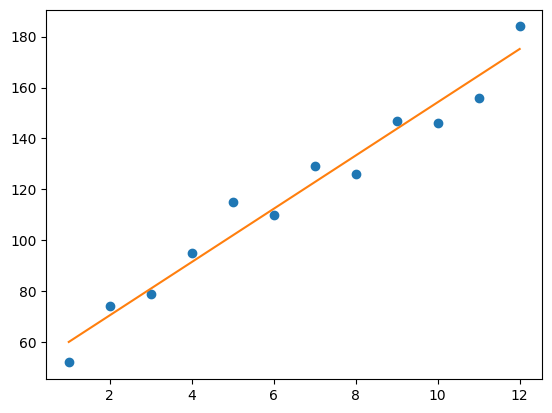

In [15]:

def get_gradient_at_b(x, y, b, m):
  diff = sum([j - (m*i+b) for i, j in zip(x, y)])
  b_gradient = (-2 / len(x)) * diff
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  diff = sum([i*(j - (m*i+b)) for i, j in zip(x, y)])
  m_gradient = (-2 / len(x)) * diff
  return m_gradient

def step_gradient(x, y, b_current, m_current, learning_rate):
  b_gradient = get_gradient_at_b(x, y, b_current, m_current)
  m_gradient = get_gradient_at_m(x, y, b_current, m_current)
  b = b_current - (learning_rate * b_gradient)
  m = m_current - (learning_rate * m_gradient)
  return b, m

def gradient_descent(x, y, learning_rate, num_iterations):
  b = 0
  m = 0
  for step in range(num_iterations):
    b, m = step_gradient(x, y, b, m, learning_rate)
  return b, m

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#Uncomment the line below to run your gradient_descent function
b, m = gradient_descent(months, revenue, 0.01, 1000)

#Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

print(b, m)

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()